In [1]:
import os
import re
import math
import json
import random
from dotenv import load_dotenv
from huggingface_hub import login
from items import Item
import matplotlib.pyplot as plt
import numpy as np
import pickle
from collections import Counter
from openai import OpenAI

# environment

load_dotenv()
os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY', 'your-key-if-not-using-env')
os.environ['HF_TOKEN'] = os.getenv('HF_TOKEN', 'your-key-if-not-using-env')

In [2]:
with open('train.pkl', 'rb') as file:
    train = pickle.load(file)

with open('test.pkl', 'rb') as file:
    test = pickle.load(file)

In [3]:
# First let's work on a good prompt for a Frontier model
# Notice that I'm removing the " to the nearest dollar"
# When we train our own models, we'll need to make the problem as easy as possible, 
# but a Frontier model needs no such simplification.

def messages_for(item):
    system_message = "An item is considered serendipitous if it is unexpected, yet interesting or valuable to the user " 
    system_message += "based on their preferences, behavior, or past interactions. " 
    system_message +=  "Keep in mind that serendipity is rare, typically occurring in fewer than 10% of user interactions. " 
    system_message +=  "Reply only with True or False"
    
    user_prompt = item.test_prompt()
    return [
        {"role": "system", "content": system_message},
        {"role": "user", "content": user_prompt},
    ]

In [4]:
messages_for(test[0])

[{'role': 'system',
  'content': 'An item is considered serendipitous if it is unexpected, yet interesting or valuable to the user based on their preferences, behavior, or past interactions. Keep in mind that serendipity is rare, typically occurring in fewer than 10% of user interactions. Reply only with True or False'},
 {'role': 'user',
  'content': 'Determine whether the following book would be considered *serendipitous* for the user a10f5lmypxqydf.\n\nbeau crusoe\nabout the author, i started writing regencies because of interest in the napoleonic wars. i like writing about warfare at sea and ordinary people of the british isles, rather than lords and ladies. in my spare time i like to read british crime fiction and history, particularly the u.s. indian wars. i currently live in utah. im a former park ranger, and double rita award and spur award winner. i have five interesting children and four grands. favorite authors include robert crais and richard woodman. shipwrecked!stranded a

In [5]:
openai = OpenAI()
def gpt_4o_mini(item):
    response = openai.chat.completions.create(
        model="gpt-4o-mini", 
        messages=messages_for(item),
        seed=42,
        max_tokens=5
    )
    reply = response.choices[0].message.content
    return reply

In [6]:
test[0].serendipity

False

1: Guess: False Truth: False Error: False Item: beau crusoe
2: Guess: False Truth: False Error: False Item: stolen
3: Guess: False Truth: False Error: False Item: a pretty little liars 4book box set wick...
4: Guess: True Truth: False Error: True Item: shatter me shatter me, 1
5: Guess: False Truth: False Error: False Item: the disenchantments
6: Guess: True Truth: False Error: True Item: catching fire hunger games, book two vol...
7: Guess: False Truth: False Error: False Item: how to lead a life of crime
8: Guess: True Truth: True Error: False Item: the sweetness at the bottom of the pie a...
9: Guess: False Truth: False Error: False Item: outliers the story of success
10: Guess: False Truth: False Error: False Item: being nikki airhead, book 2
11: Guess: False Truth: False Error: False Item: dork diaries 1 tales from a notsofabulou...
12: Guess: True Truth: False Error: True Item: front and center dairy queen trilogy
13: Guess: True Truth: False Error: True Item: lovestruck summer
1

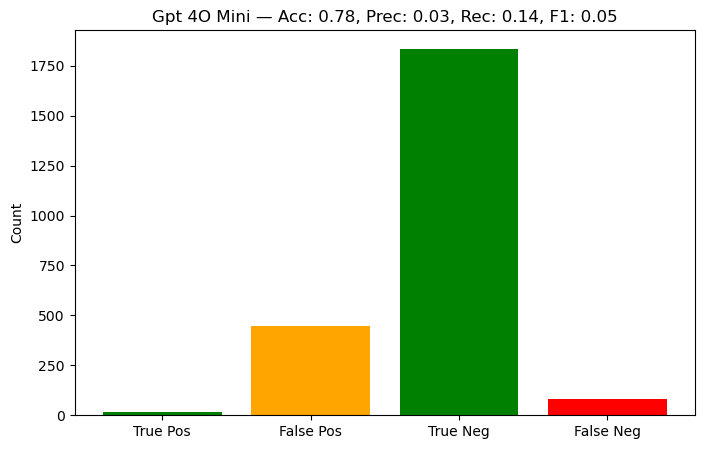


Detailed classification report:
                   precision    recall  f1-score   support

Not Serendipitous       0.96      0.80      0.87      2281
    Serendipitous       0.03      0.14      0.05        97

         accuracy                           0.78      2378
        macro avg       0.49      0.47      0.46      2378
     weighted avg       0.92      0.78      0.84      2378



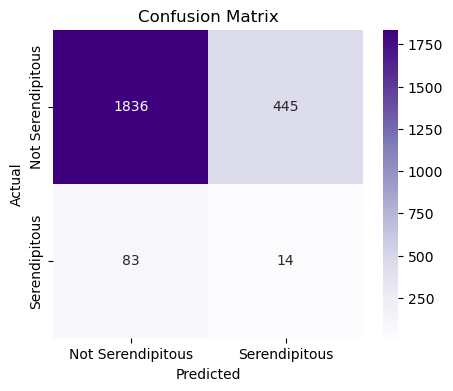

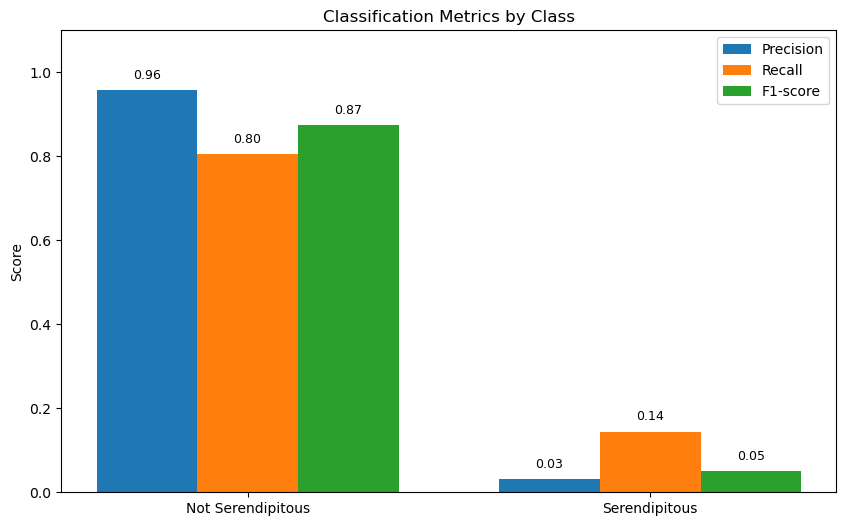

In [7]:
from testing import Tester
Tester.test(gpt_4o_mini, test)